In [1]:
import pandas as pd
import numpy as np

In [2]:
bank=pd.read_csv("bankruptcy-prevention.csv",sep=';')
bank

industrial_risk   management_risk   financial_flexibility   credibility  \
0                0.5               1.0                     0.0           0.0   
1                0.0               1.0                     0.0           0.0   
2                1.0               0.0                     0.0           0.0   
3                0.5               0.0                     0.0           0.5   
4                1.0               1.0                     0.0           0.0   
..               ...               ...                     ...           ...   
245              0.0               1.0                     1.0           1.0   
246              1.0               1.0                     0.5           1.0   
247              0.0               1.0                     1.0           0.5   
248              1.0               0.0                     0.5           1.0   
249              1.0               0.0                     0.5           0.5   

      competitiveness   operating_risk           class  
0                 0.0              0.5      bankruptcy  
1                 0.0              1.0      bankruptcy  
2                 0.0              1.0      bankruptcy  
3                 0.0              1.0      bankruptcy  
4                 0.0              1.0      bankruptcy  
..                ...              ...             ...  
245               1.0              1.0  non-bankruptcy  
246               1.0              0.0  non-bankruptcy  
247               0.5              0.0  non-bankruptcy  
248               0.5              0.0  non-bankruptcy  
249               1.0              1.0  non-bankruptcy  

[250 rows x 7 columns]

In [3]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
bank[' class']=label_encoder.fit_transform(bank[' class'])
bank

industrial_risk   management_risk   financial_flexibility   credibility  \
0                0.5               1.0                     0.0           0.0   
1                0.0               1.0                     0.0           0.0   
2                1.0               0.0                     0.0           0.0   
3                0.5               0.0                     0.0           0.5   
4                1.0               1.0                     0.0           0.0   
..               ...               ...                     ...           ...   
245              0.0               1.0                     1.0           1.0   
246              1.0               1.0                     0.5           1.0   
247              0.0               1.0                     1.0           0.5   
248              1.0               0.0                     0.5           1.0   
249              1.0               0.0                     0.5           0.5   

      competitiveness   operating_risk   class  
0                 0.0              0.5       0  
1                 0.0              1.0       0  
2                 0.0              1.0       0  
3                 0.0              1.0       0  
4                 0.0              1.0       0  
..                ...              ...     ...  
245               1.0              1.0       1  
246               1.0              0.0       1  
247               0.5              0.0       1  
248               0.5              0.0       1  
249               1.0              1.0       1  

[250 rows x 7 columns]

In [4]:
bank=bank.rename({' management_risk':'management_risk'},axis=1)
bank=bank.rename({' financial_flexibility':'financial_flexibility'},axis=1)
bank=bank.rename({' credibility':'credibility'},axis=1)
bank=bank.rename({' competitiveness':'competitivness'},axis=1) 
bank=bank.rename({' operating_risk':'operating_risk'},axis=1)
bank=bank.rename({' class':'y'},axis=1)
bank

industrial_risk  management_risk  financial_flexibility  credibility  \
0                0.5              1.0                    0.0          0.0   
1                0.0              1.0                    0.0          0.0   
2                1.0              0.0                    0.0          0.0   
3                0.5              0.0                    0.0          0.5   
4                1.0              1.0                    0.0          0.0   
..               ...              ...                    ...          ...   
245              0.0              1.0                    1.0          1.0   
246              1.0              1.0                    0.5          1.0   
247              0.0              1.0                    1.0          0.5   
248              1.0              0.0                    0.5          1.0   
249              1.0              0.0                    0.5          0.5   

     competitivness  operating_risk  y  
0               0.0             0.5  0  
1               0.0             1.0  0  
2               0.0             1.0  0  
3               0.0             1.0  0  
4               0.0             1.0  0  
..              ...             ... ..  
245             1.0             1.0  1  
246             1.0             0.0  1  
247             0.5             0.0  1  
248             0.5             0.0  1  
249             1.0             1.0  1  

[250 rows x 7 columns]

# Logistic Regression after dropped Duplicates

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

In [6]:
x=bank.iloc[:,[0,1,2,3,4,5]]
y=bank.iloc[:,6]
classifier=LogisticRegression()
classifier.fit(x,y)


LogisticRegression()

In [7]:
x

industrial_risk  management_risk  financial_flexibility  credibility  \
0                0.5              1.0                    0.0          0.0   
1                0.0              1.0                    0.0          0.0   
2                1.0              0.0                    0.0          0.0   
3                0.5              0.0                    0.0          0.5   
4                1.0              1.0                    0.0          0.0   
..               ...              ...                    ...          ...   
245              0.0              1.0                    1.0          1.0   
246              1.0              1.0                    0.5          1.0   
247              0.0              1.0                    1.0          0.5   
248              1.0              0.0                    0.5          1.0   
249              1.0              0.0                    0.5          0.5   

     competitivness  operating_risk  
0               0.0             0.5  
1               0.0             1.0  
2               0.0             1.0  
3               0.0             1.0  
4               0.0             1.0  
..              ...             ...  
245             1.0             1.0  
246             1.0             0.0  
247             0.5             0.0  
248             0.5             0.0  
249             1.0             1.0  

[250 rows x 6 columns]

In [8]:
y

0      0
1      0
2      0
3      0
4      0
      ..
245    1
246    1
247    1
248    1
249    1
Name: y, Length: 250, dtype: int32

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state = 123,test_size = 0.30)

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(175, 6)
(175,)
(75, 6)
(75,)


In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression()

In [13]:
log_model.predict_proba(X_train)

array([[0.03838695, 0.96161305],
       [0.00320099, 0.99679901],
       [0.00553341, 0.99446659],
       [0.03423106, 0.96576894],
       [0.06840325, 0.93159675],
       [0.03463999, 0.96536001],
       [0.96569797, 0.03430203],
       [0.16670207, 0.83329793],
       [0.00355978, 0.99644022],
       [0.38445152, 0.61554848],
       [0.00942758, 0.99057242],
       [0.05197503, 0.94802497],
       [0.03309202, 0.96690798],
       [0.02270362, 0.97729638],
       [0.02921805, 0.97078195],
       [0.87368304, 0.12631696],
       [0.07754732, 0.92245268],
       [0.00645718, 0.99354282],
       [0.01707505, 0.98292495],
       [0.03879536, 0.96120464],
       [0.87368304, 0.12631696],
       [0.91404723, 0.08595277],
       [0.02974983, 0.97025017],
       [0.00823197, 0.99176803],
       [0.3707448 , 0.6292552 ],
       [0.00395862, 0.99604138],
       [0.02622072, 0.97377928],
       [0.68899742, 0.31100258],
       [0.11368173, 0.88631827],
       [0.93332529, 0.06667471],
       [0.

In [14]:
y_pred_train_data = log_model.predict(X_train)

In [15]:
y_pred = log_model.predict(X_test)
y_pred

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0])

In [16]:
from sklearn.metrics import classification_report

In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.98      1.00      0.99        44

    accuracy                           0.99        75
   macro avg       0.99      0.98      0.99        75
weighted avg       0.99      0.99      0.99        75



In [18]:
import pickle

In [21]:
f = open('my1_classifier.pickle', 'wb')
pickle.dump(log_model, f)
f.close()

In [93]:
##Kfold

In [17]:


import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [18]:
kfold = KFold(n_splits=5, random_state=0, shuffle=True)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, x, y, cv=kfold)

In [19]:
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 97.095% (3.834%)


In [20]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logit_roc_score=roc_auc_score(y,classifier.predict(x))
Logit_roc_score  

0.98

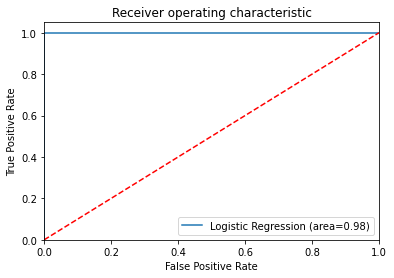

In [21]:
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y,classifier.predict_proba(x)[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()   

# Logistic Regression After Upsampled

In [22]:
from imblearn.over_sampling import SMOTE

In [23]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(bnk.iloc[:,[0,1,2,3,4,5]], bnk['result'])

In [24]:
from collections import Counter
print('Original dataset shape %s' % Counter(bnk['result']))
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({1: 143, 0: 107})
Resampled dataset shape Counter({0: 143, 1: 143})


In [25]:
bnk = pd.concat([X_res, y_res], axis=1)
bnk.head()

industrial_risk  management_risk  financial_flexibility  credibility  \
0              0.5              1.0                    0.0          0.0   
1              0.0              1.0                    0.0          0.0   
2              1.0              0.0                    0.0          0.0   
3              0.5              0.0                    0.0          0.5   
4              1.0              1.0                    0.0          0.0   

   competitiveness  operating_risk  result  
0              0.0             0.5       0  
1              0.0             1.0       0  
2              0.0             1.0       0  
3              0.0             1.0       0  
4              0.0             1.0       0

In [26]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
x = bnk.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [27]:
df.columns=(bnk.columns)
df

industrial_risk  management_risk  financial_flexibility  credibility  \
0                0.5              1.0                    0.0     0.000000   
1                0.0              1.0                    0.0     0.000000   
2                1.0              0.0                    0.0     0.000000   
3                0.5              0.0                    0.0     0.500000   
4                1.0              1.0                    0.0     0.000000   
..               ...              ...                    ...          ...   
281              1.0              1.0                    0.0     0.000000   
282              0.0              1.0                    0.0     0.000000   
283              1.0              1.0                    0.0     0.321623   
284              0.5              0.5                    0.0     0.000000   
285              1.0              1.0                    0.0     0.000000   

     competitiveness  operating_risk  result  
0           0.000000        0.500000     0.0  
1           0.000000        1.000000     0.0  
2           0.000000        1.000000     0.0  
3           0.000000        1.000000     0.0  
4           0.000000        1.000000     0.0  
..               ...             ...     ...  
281         0.000000        1.000000     0.0  
282         0.085631        0.914369     0.0  
283         0.000000        0.000000     0.0  
284         0.000000        1.000000     0.0  
285         0.000000        1.000000     0.0  

[286 rows x 7 columns]

In [28]:
bnk.describe()

industrial_risk  management_risk  financial_flexibility  credibility  \
count       286.000000       286.000000             286.000000   286.000000   
mean          0.530586         0.633239               0.331623     0.417761   
std           0.414829         0.403007               0.394773     0.415551   
min           0.000000         0.000000               0.000000     0.000000   
25%           0.000000         0.500000               0.000000     0.000000   
50%           0.500000         0.500000               0.000000     0.500000   
75%           1.000000         1.000000               0.500000     1.000000   
max           1.000000         1.000000               1.000000     1.000000   

       competitiveness  operating_risk      result  
count       286.000000      286.000000  286.000000  
mean          0.419194        0.591513    0.500000  
std           0.439668        0.432341    0.500876  
min           0.000000        0.000000    0.000000  
25%           0.000000        0.000000    0.000000  
50%           0.500000        0.500000    0.500000  
75%           1.000000        1.000000    1.000000  
max           1.000000        1.000000    1.000000

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        286 non-null    float64
 1   management_risk        286 non-null    float64
 2   financial_flexibility  286 non-null    float64
 3   credibility            286 non-null    float64
 4   competitiveness        286 non-null    float64
 5   operating_risk         286 non-null    float64
 6   result                 286 non-null    float64
dtypes: float64(7)
memory usage: 15.8 KB


In [30]:
train = df.iloc[:,:6] 
(train)
test = df.iloc[:,6]
test

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
281    0.0
282    0.0
283    0.0
284    0.0
285    0.0
Name: result, Length: 286, dtype: float64

In [31]:
x_train,x_test,y_train,y_test = train_test_split(train,test,test_size=0.2)

In [32]:
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (228, 6) (228,)
Test set: (58, 6) (58,)


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [34]:
yhat = LR.predict(x_test)
yhat

array([1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0.])

In [35]:
yhat_prob = LR.predict_proba(x_test)
yhat_prob

array([[0.41472693, 0.58527307],
       [0.57647177, 0.42352823],
       [0.45702341, 0.54297659],
       [0.5820284 , 0.4179716 ],
       [0.56070125, 0.43929875],
       [0.40763987, 0.59236013],
       [0.42887094, 0.57112906],
       [0.36359073, 0.63640927],
       [0.57292773, 0.42707227],
       [0.40782889, 0.59217111],
       [0.51973866, 0.48026134],
       [0.44699899, 0.55300101],
       [0.51973866, 0.48026134],
       [0.45403035, 0.54596965],
       [0.54249627, 0.45750373],
       [0.52247113, 0.47752887],
       [0.52247113, 0.47752887],
       [0.5755464 , 0.4244536 ],
       [0.59215964, 0.40784036],
       [0.53766612, 0.46233388],
       [0.47283425, 0.52716575],
       [0.43996769, 0.56003231],
       [0.57895203, 0.42104797],
       [0.36782115, 0.63217885],
       [0.41061581, 0.58938419],
       [0.38913306, 0.61086694],
       [0.5820284 , 0.4179716 ],
       [0.3243366 , 0.6756634 ],
       [0.34233701, 0.65766299],
       [0.5820284 , 0.4179716 ],
       [0.

In [36]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        30
         1.0       1.00      1.00      1.00        28

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58



In [37]:
from sklearn.metrics import accuracy_score
print("accuraccy score :",np.round(accuracy_score(y_test,yhat),3))

accuraccy score : 1.0


In [38]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logit_roc_score=roc_auc_score(y_res,classifier.predict(X_res))
Logit_roc_score  

0.9965034965034966

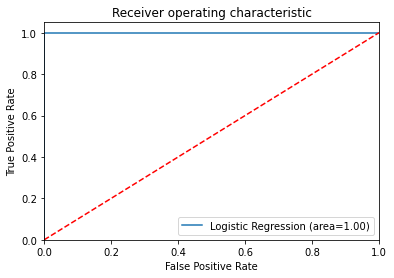

In [39]:
fpr, tpr, thresholds = roc_curve(y_res,classifier.predict_proba(X_res)[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()   

# Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
dt = DecisionTreeClassifier()
dt

DecisionTreeClassifier()

In [42]:
dt.fit(x_train,y_train)
predTree = dt.predict(x_test)

In [43]:
print (predTree [0:10])
print (y_test [0:10])

[1. 0. 1. 0. 0. 1. 1. 1. 0. 1.]
235    1.0
44     0.0
133    1.0
82     0.0
263    0.0
186    1.0
124    1.0
223    1.0
277    0.0
158    1.0
Name: result, dtype: float64


In [44]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.9827586206896551


In [45]:
from sklearn.metrics import roc_curve,roc_auc_score,precision_score,recall_score

In [46]:

print('classification report is: \n', classification_report(y_test,predTree))
    
print(confusion_matrix(y_test,predTree))

classification report is: 
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98        30
         1.0       1.00      0.96      0.98        28

    accuracy                           0.98        58
   macro avg       0.98      0.98      0.98        58
weighted avg       0.98      0.98      0.98        58

[[30  0]
 [ 1 27]]


# Support Vector Machine

In [47]:
import numpy as np
from sklearn.svm import SVC

In [49]:
clf = SVC()
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 100.0


array([[30,  0],
       [ 0, 28]], dtype=int64)